In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#set plotting parameters
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = "serif"


## Create Gaussian pulse - Eq. 3.1

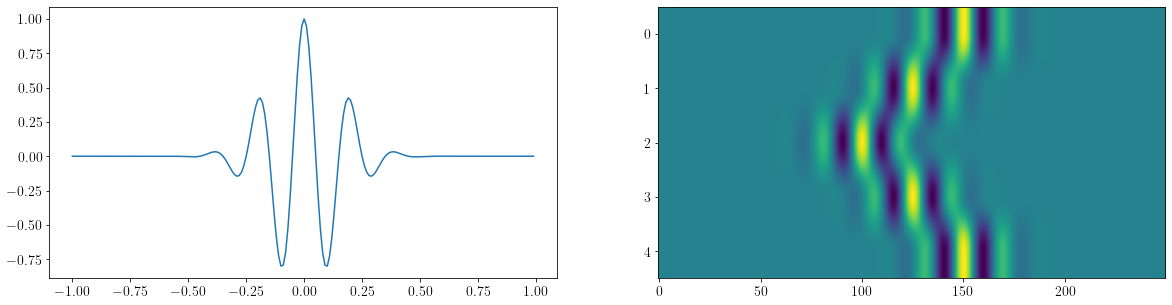

In [4]:
t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i = signal.gausspulse(t, fc=5)


l = np.zeros((250,5))
l[0:200,2] = i
l[25:225,3] = i
l[25:225,1] = i
l[50:250,0] = i
l[50:250,4] = i

fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(t, i)
ax[1].imshow(l.T,aspect='auto')


## Figure 3.2

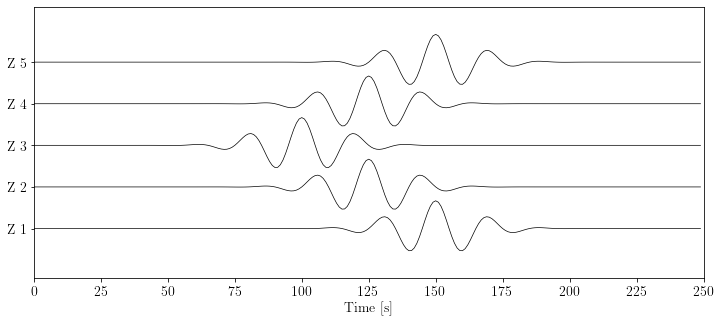

In [5]:
from matplotlib.collections import LineCollection

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

n_rows = 5
data = l
t = range(data.shape[0])
ticklocs = []
fig,ax2 = plt.subplots(figsize=(12,5))
ax2.set_xlim(0, data.shape[0])

dmin = data.min()
dmax = data.max()
dr = 1.5#
y0 = dmin -1
y1 = (n_rows - 1) * dr + dmax +1
ax2.set_ylim(y0, y1)

segs = []
for i in range(n_rows):
    segs.append(np.column_stack((t, data[:, i])))
    ticklocs.append(i * dr)

offsets = np.zeros((n_rows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets,colors='black',linewidths=0.7)
ax2.add_collection(lines)
plt.yticks([0,1.5,3,4.5,6])
plt.xticks([0,25,50,75,100,125,150,175,200,225,250])
plt.xlabel('Time [s]')
ax2.set_yticklabels(['Z %d'%i for i in range(1,6)]);
#plt.savefig('multivariate_gaussian_pulse.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)


## Figure 3.3 - Compute example cross correlation of Z3 and Z1

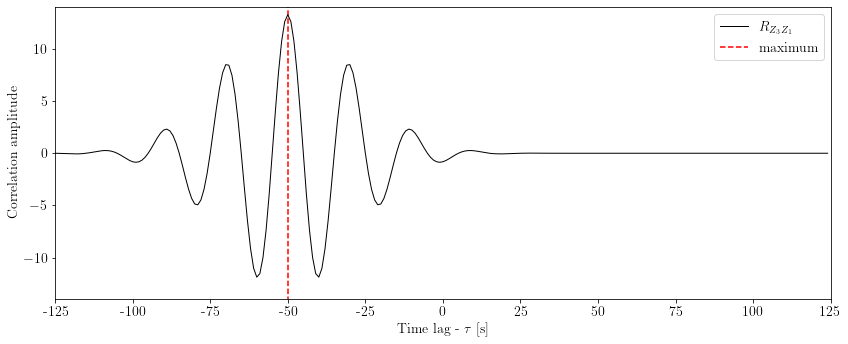

In [6]:
fig,ax = plt.subplots(figsize=(12,5))
import matplotlib
matplotlib.rcParams.update({'font.size': 14})


cross_cor = np.correlate(l[:,2],l[:,0], "same")

ax.plot(cross_cor,'k',label = r'$R_{Z_3Z_1}$',linewidth=1)

ax.set_xticks(np.arange(0,275,25));
ax.set_xticklabels(np.arange(-125,150,25));

ax.vlines(cross_cor.argmax(),-15,15,'r',linestyles='dashed',label='maximum')

plt.xlabel(r'Time lag - $\tau$ [s]')
plt.ylabel('Correlation amplitude')
plt.legend()
ax.set_ylim(-14,14)
ax.set_xlim(0,250)
plt.tight_layout()

#plt.savefig('multivariate_gaussian_pulse_RR.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)


## Figure 3.4 - Lead lag matrix

Zi leading pulse, i= 3


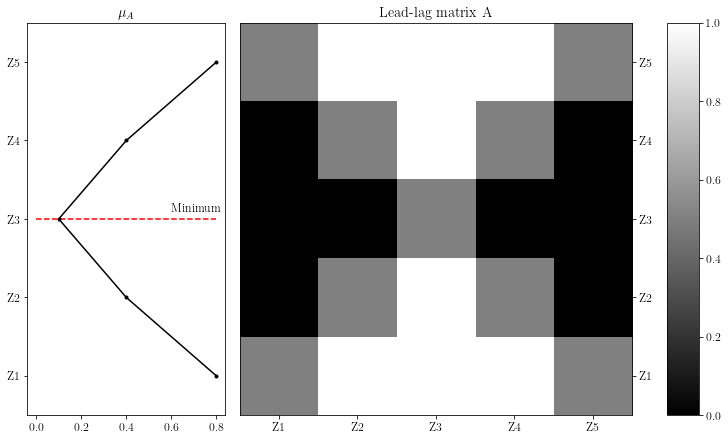

In [8]:
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from big_slam import lead_lag_detector,max_peak_detector

l_df = pd.DataFrame(l)

lead_lag = lead_lag_detector(l_df,5,5)


print('Zi leading pulse, i=',lead_lag.pulse_location+1)

lead_lag.plot()

#plt.savefig('gaussian_pulse_lead_lag_matrix.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)


## Figure 3.5 - Max peak plot

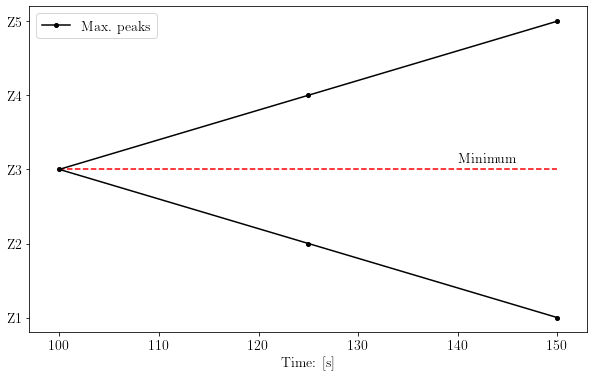

In [9]:
max_peak_detector(l_df,5).plot()
#plt.savefig('gaussian_pulse_max_peak_detector.png', dpi = 300, bbox_inches = 'tight', pad_inches = .1)